# Projekt

In [88]:
from pandas import read_csv
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score, classification_report

In [89]:
data = read_csv(
    "../data/iris.csv",
    sep=",",
    decimal=".",
    skiprows=None,
    )

data_num = data.select_dtypes(include="number")

## Explorative Datenanalyse

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          150 non-null    int64  
 1   sepal_length_cm  150 non-null    float64
 2   sepal_width_cm   150 non-null    float64
 3   petal_length_cm  150 non-null    float64
 4   petal_width_cm   150 non-null    float64
 5   species          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [91]:
data.describe()

,instant,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [92]:
data["sepal_length_cm"].mean()

np.float64(5.843333333333334)

In [93]:
data["sepal_length_cm"].std()

np.float64(0.828066127977863)

<Axes: title={'center': 'Sepal Length Distribution'}, ylabel='Frequency'>

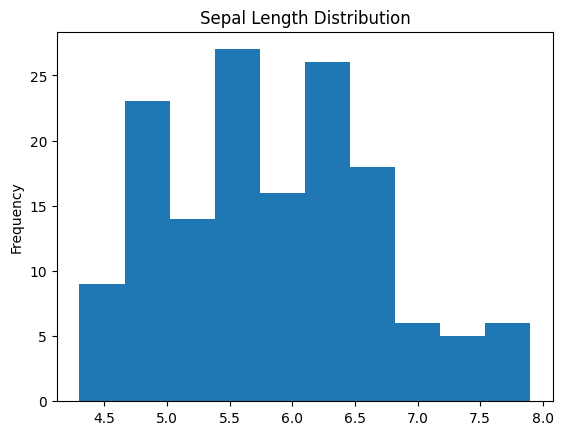

In [94]:
data["sepal_length_cm"].plot(kind="hist", title="Sepal Length Distribution")


<Axes: xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

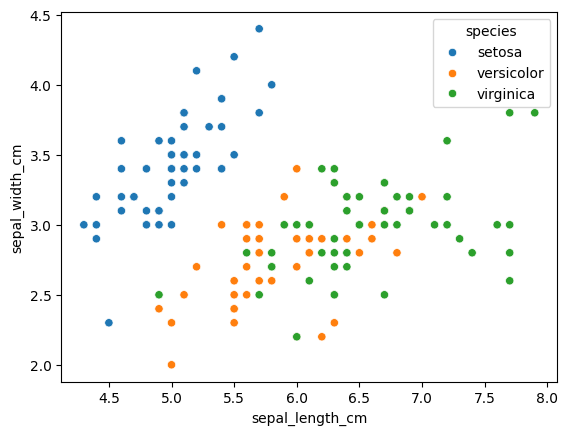

In [95]:
sns.scatterplot(
    data=data,
    x="sepal_length_cm",
    y="sepal_width_cm",
    hue="species",)

In [96]:
data[["sepal_length_cm", "petal_length_cm"]].corr()

,sepal_length_cm,petal_length_cm
sepal_length_cm,1.000000,0.871754
petal_length_cm,0.871754,1.000000


<Axes: >

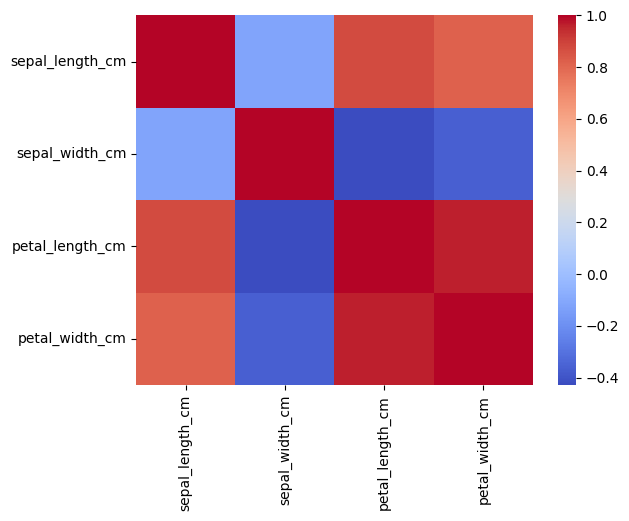

In [97]:
sns.heatmap(
    data[["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"]].corr(),
    cmap="coolwarm",
)

/workspaces/data-science-SS25/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/data-science-SS25/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/workspaces/data-science-SS25/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/worksp

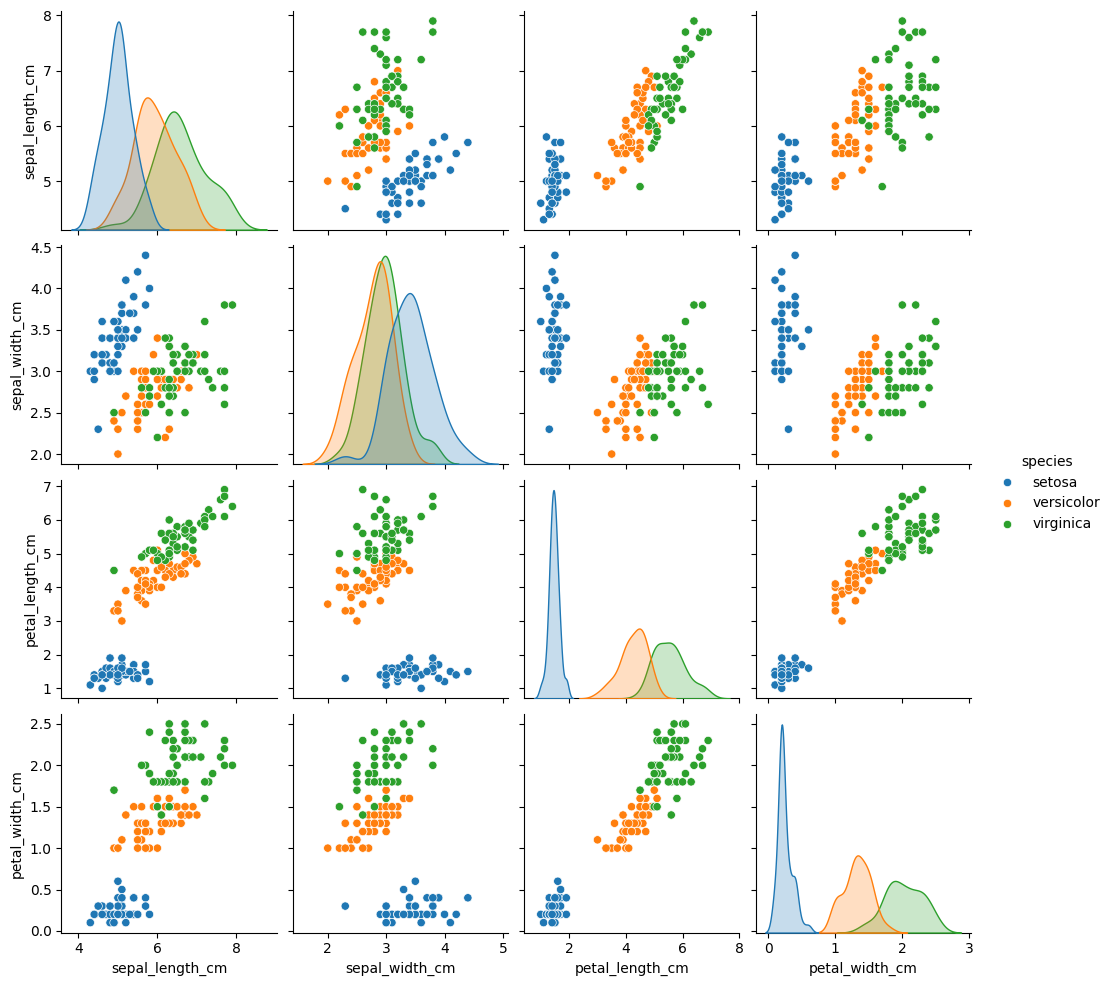

In [98]:
sns.pairplot(
    data=data,
    hue="species",
    vars=["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"],
)

## Unsupervised Learning

In [99]:
Z = hierarchy.linkage(data_num)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [13.75, 13.75, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [73.75, 73.75, 120.0, 120.0],
  [31.875, 31.875, 96.875, 96.875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [157.5, 157.5, 203.75, 203.75],
  [235.0, 235.0, 245.0, 245.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [240.0, 240.0, 264.375, 264.375],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 3

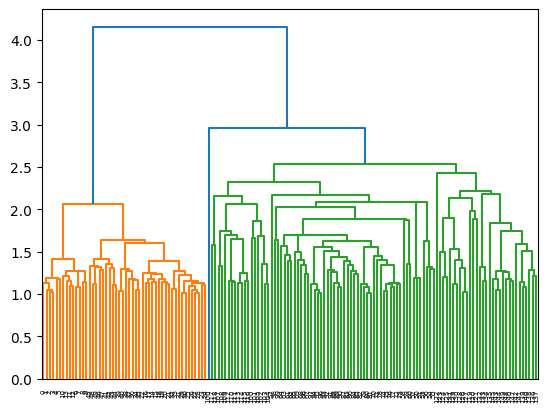

In [100]:
hierarchy.dendrogram(Z)

In [101]:
# Schätzung Cluster: 3

In [102]:
data.columns

Index(['instant', 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species'],
      dtype='object')

In [103]:
data["species"] = LabelEncoder().fit_transform(data["species"])

In [104]:
target = ["species"]

features = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm']



X = data[features]
y = data[target]

In [105]:
X.shape, y.shape

((150, 4), (150, 1))

### Agglomerative Clustering

In [106]:
hierarchical_cluster_engine = AgglomerativeClustering(n_clusters=3)

In [107]:
hierarchical_cluster_engine.fit(data_num)

AgglomerativeClustering(n_clusters=3)

In [108]:
hierarchical_cluster_engine.fit_predict(data_num)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [109]:
accuracy = (hierarchical_cluster_engine.labels_ == data["species"])

In [110]:
### es ist ersichtlich, dass das modell uns die erwarteten ergebnisse liefert (accuracy sehr gut)

### KMeans clustering

In [111]:
k_means_engine = KMeans(n_clusters=3, max_iter=10)
k_means_engine.fit_predict(data_num)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)